In [299]:
# install.packages("BatchGetSymbols")
# install.packages("tidyverse")
# install.packages("boot")
# install.packages("ggplot2")
# install.packages("fPortfolio")
# install.packages("dplyr")
# install.packages("knitr")

In [4]:
library(BatchGetSymbols) #load data stocks
library(tidyverse)
library(boot)
library(ggplot2)
library(fPortfolio)
library(dplyr)
library(knitr)

In [152]:
# Definindo as datas e a frequência da pesquisa

primeira_data <- as.Date("2021-06-01")
ultima_data <- Sys.Date()
frequencia <- "daily"

# Definindo os ativos procurados

ativos <- c("BTC-USD","ETH-USD","DOGE-USD","XRP-USD",
            "SHIB-USD","SOL1-USD","DOT1-USD","LINK-USD",
            "ADA-USD","LTC-USD","XMR-USD","XLM-USD","ZEC-USD",
           "DASH-USD","NEO-USD","EOS-USD","TRX-USD","BCH-USD")

In [193]:
ativos

[1] "BTC-USD"  "ETH-USD"  "DOGE-USD" "XRP-USD"  "SHIB-USD" "SOL1-USD"
 [7] "DOT1-USD" "LINK-USD" "ADA-USD"  "LTC-USD"  "XMR-USD"  "XLM-USD" 
[13] "ZEC-USD"  "DASH-USD" "NEO-USD"  "EOS-USD"  "TRX-USD"  "BCH-USD"

In [70]:
# Extraindo os dados dos ativos

output <- BatchGetSymbols(tickers = ativos,
                          first.date = primeira_data,
                          last.date = ultima_data,
                          freq.data = frequencia,
                          cache.folder = file.path(tempdir(),
                                                   "BGS_Cache"))


Running BatchGetSymbols for:

   tickers =BTC-USD, ETH-USD, DOGE-USD, XRP-USD, SHIB-USD, SOL1-USD, DOT1-USD, LINK-USD, ADA-USD, LTC-USD, XMR-USD, XLM-USD, ZEC-USD, DASH-USD, NEO-USD, EOS-USD, TRX-USD, BCH-USD


^GSPC | yahoo (1|1)
 | Found cache file

BTC-USD | yahoo (1|18)
 | Found cache file
 - Got 100% of valid prices | Good stuff!

ETH-USD | yahoo (2|18)
 | Found cache file
 - Got 100% of valid prices | Good job!

DOGE-USD | yahoo (3|18)
 | Found cache file
 - Got 100% of valid prices | You got it!

XRP-USD | yahoo (4|18)
 | Found cache file
 - Got 100% of valid prices | You got it!

SHIB-USD | yahoo (5|18)
 | Found cache file
 - Got 100% of valid prices | Good job!

SOL1-USD | yahoo (6|18)
 | Found cache file
 - Got 100% of valid prices | Got it!

DOT1-USD | yahoo (7|18)
 | Found cache file
 - Got 100% of valid prices | Good stuff!

LINK-USD | yahoo (8|18)
 | Found cache file
 - Got 100% of valid prices | You got it!

ADA-USD | yahoo (9|18)
 | Found cache file
 - Got 100% of vali

In [71]:
# Visualizando os dados
output$df.control

ticker,src,download.status,total.obs,perc.benchmark.dates,threshold.decision
<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
BTC-USD,yahoo,OK,178,1,KEEP
ETH-USD,yahoo,OK,178,1,KEEP
DOGE-USD,yahoo,OK,178,1,KEEP
XRP-USD,yahoo,OK,178,1,KEEP
SHIB-USD,yahoo,OK,178,1,KEEP
SOL1-USD,yahoo,OK,178,1,KEEP
DOT1-USD,yahoo,OK,178,1,KEEP
LINK-USD,yahoo,OK,178,1,KEEP
ADA-USD,yahoo,OK,178,1,KEEP


In [72]:
ativos_keep <- subset(select(output$df.control,c(ticker,threshold.decision)), threshold.decision=='KEEP')['ticker']

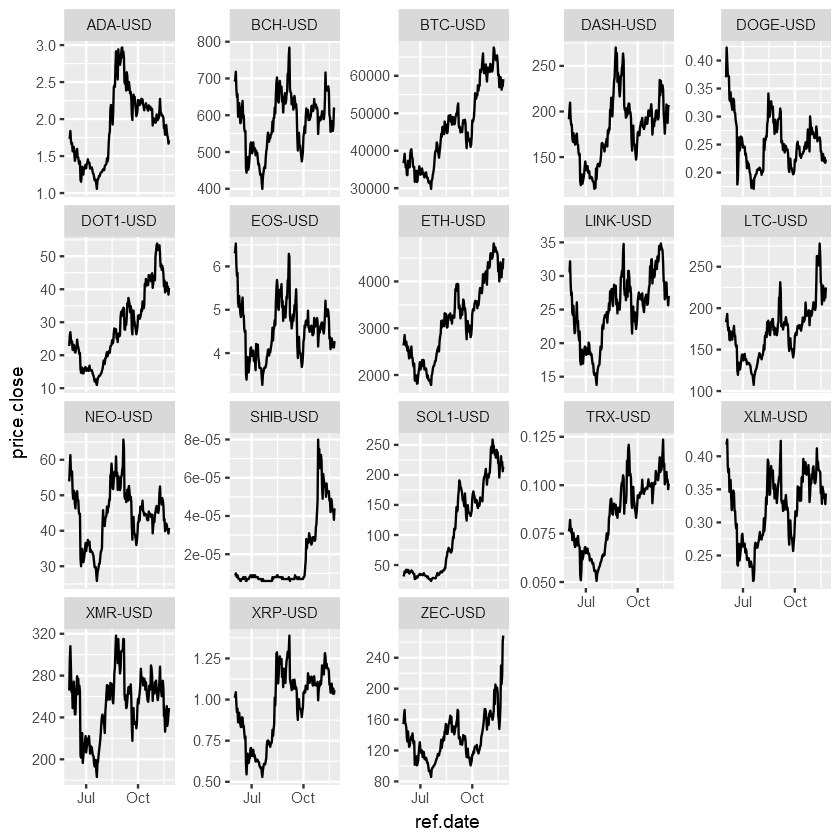

In [73]:
# Visualizando o histórico dos ativos

historico <- ggplot(output$df.tickers,
             aes(x = ref.date,
                 y = price.close)) +
             geom_line() +
             facet_wrap(~ ticker,
                        scales = "free_y")

print(historico)

In [143]:
# data clean

ativos2 <- sub(".SA","",ativos)
ativos2 <- sub("-","",ativos2)
i=1;

for (val in ativos){
df <- na.omit(subset(select(output$df.tickers,c(ticker,ret.closing.prices)), ticker==ativos[i]))
colnames(df)[2]<-paste(ativos2[i],'',sep='')
assign(paste(ativos2[i],'',sep=''), df[2])

i<-i+1
}

In [191]:
ativos2

[1] "BTCUSD"  "ETHUSD"  "DOGEUSD" "XRPUSD"  "SHIBUSD" "SOL1USD" "DOT1USD"
 [8] "LINKUSD" "ADAUSD"  "LTCUSD"  "XMRUSD"  "XLMUSD"  "ZECUSD"  "DASHUSD"
[15] "NEOUSD"  "EOSUSD"  "TRXUSD"  "BCHUSD"

# full portfolio

In [175]:
retornos <- cbind(BTCUSD,ETHUSD,DOGEUSD,XRPUSD,SHIBUSD,SOL1USD,DOT1USD,LINKUSD,ADAUSD,
                  LTCUSD,XMRUSD,XLMUSD,ZECUSD,DASHUSD,NEOUSD,EOSUSD,TRXUSD,BCHUSD)
retornos <- as.timeSeries(retornos)

In [178]:
portfolio_eficiente <- tangencyPortfolio(retornos, spec = portfolioSpec(),
                                         constraints = "LongOnly")

portfolio_menor_risco <- minvariancePortfolio(retornos,
                                              spec = portfolioSpec(),
                                              constraints = "LongOnly")

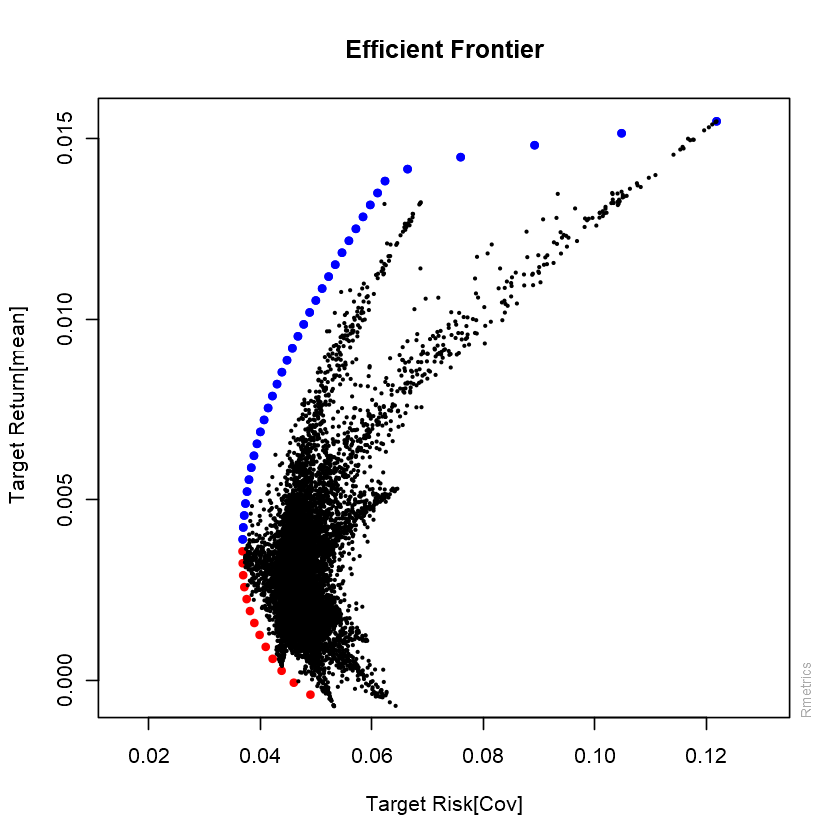

In [186]:
fronteira <- portfolioFrontier(retornos)
frontierPlot(fronteira, col = c("blue", "red"), pch = 20)
monteCarloPoints(fronteira, mcSteps = 10000, pch = 20, cex = 0.25)

In [188]:
kable(cbind(getWeights(portfolio_eficiente),getWeights(portfolio_menor_risco)))



|        |          |          |
|:-------|---------:|---------:|
|BTCUSD  | 0.0000000| 0.8402222|
|ETHUSD  | 0.0000000| 0.0000000|
|DOGEUSD | 0.0000000| 0.0000000|
|XRPUSD  | 0.0000000| 0.0000000|
|SHIBUSD | 0.2549794| 0.0000000|
|SOL1USD | 0.7450206| 0.0463841|
|DOT1USD | 0.0000000| 0.0000000|
|LINKUSD | 0.0000000| 0.0000000|
|ADAUSD  | 0.0000000| 0.1133938|
|LTCUSD  | 0.0000000| 0.0000000|
|XMRUSD  | 0.0000000| 0.0000000|
|XLMUSD  | 0.0000000| 0.0000000|
|ZECUSD  | 0.0000000| 0.0000000|
|DASHUSD | 0.0000000| 0.0000000|
|NEOUSD  | 0.0000000| 0.0000000|
|EOSUSD  | 0.0000000| 0.0000000|
|TRXUSD  | 0.0000000| 0.0000000|
|BCHUSD  | 0.0000000| 0.0000000|

# reduced portfolio

In [189]:
# reduced portfolio
retornos_red <- cbind(BTCUSD,ETHUSD,XRPUSD,LTCUSD,XMRUSD,XLMUSD)
retornos_red <- as.timeSeries(retornos_red)

In [190]:
portfolio_tan_red <- tangencyPortfolio(retornos_red, spec = portfolioSpec(),
                                         constraints = "LongOnly")

portfolio_minvar_red <- minvariancePortfolio(retornos_red,
                                              spec = portfolioSpec(),
                                              constraints = "LongOnly")

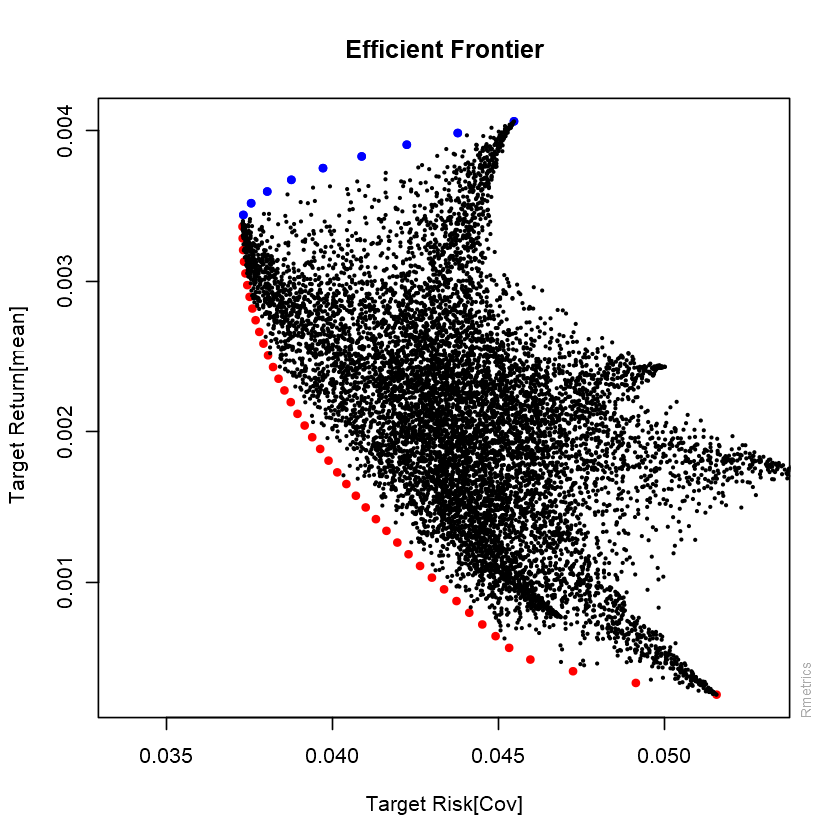

In [200]:
fronteira2 <- portfolioFrontier(retornos_red)
frontierPlot(fronteira2, col = c("blue", "red"), pch = 20)
monteCarloPoints(fronteira2, mcSteps = 10000, pch = 20, cex = 0.25)

In [185]:
kable(cbind(getWeights(portfolio_tan_red),getWeights(portfolio_minvar_red)))



|       |          |          |
|:------|---------:|---------:|
|BTCUSD | 0.5880916| 0.9625979|
|ETHUSD | 0.4119084| 0.0226302|
|XRPUSD | 0.0000000| 0.0000000|
|LTCUSD | 0.0000000| 0.0000000|
|XMRUSD | 0.0000000| 0.0147719|
|XLMUSD | 0.0000000| 0.0000000|